In [30]:
# pylint: disable=C0103,W0621,C0116,R0913,C0114,E0401,R0914,W0613
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Task:
Classifying handwritten digits from the famous MNIST dataset.

This dataset contains $n$ = 28x28 images of handwritten digits.

$$
\left[\begin{array}{ll}
x_{1} & x_{2}
\end{array}\right]\left[\begin{array}{lll}
w_{11} & w_{12} & w_{13} \\
w_{21} & w_{22} & w_{23}
\end{array}\right]=\left[\begin{array}{l}
x_{1} w_{11}+x_{2} w_{21} \\
x_{1} w_{12}+x_{2} w_{22} \\
x_{1} w_{13}+x_{2} w_{23}
\end{array}\right]^{\prime}=\left[\begin{array}{l}
h_{1} \\
h_{2} \\
h_{3}
\end{array}\right]^{\prime}
$$

## Difference between scalar, vector matrix and tensor
Before starting this excerise, the differences between those 4 types has to be understood.
Please open the scalar_vector_matrix_tensor.ipynb notebook if you are not familiar with them.


## NN Architecture


**1. Input layer:** In this layer, we input our dataset, consisting of 28x28 images. We flatten these images into one array with $ 28 × 28 = 784 $ elements. This means our input layer will have 784 nodes.

**2. Hidden layer 1:** In this layer, we have decided to reduce the number of nodes from 784 in the input layer to 128 nodes.

**3. Hidden layer 2:** In this layer, we have decided to go with 64 nodes, from the 128 nodes in the first hidden layer. This is no new challenge, since we already reduced the number in the first layer.

**4. Output layer:** In this layer, we are reducing the 64 nodes to a total of 10 nodes, so that we can evaluate the nodes against the label. This label is received in the form of an array with 10 elements, where one of the elements is 1, while the rest is 0.

### Forward propagation

$$
\begin{gathered}
Z^{[1]}=W^{[1]} X+b^{[1]} \\
\left.A^{[1]}=g_{\mathrm{ReLU}}\left(Z^{[1]}\right)\right) \\
Z^{[2]}=W^{[2]} A^{[1]}+b^{[2]} \\
A^{[2]}=g_{\text {softmax }}\left(Z^{[2]}\right)
\end{gathered}
$$

### Backward propagation

$$
\begin{aligned}
&d Z^{[2]}=A^{[2]}-Y\\
&d W^{[2]}=\frac{1}{m} d Z^{[2]} A^{[1] T}\\
&d B^{[2]}=\frac{1}{m} \Sigma d Z^{[2]}\\
&d Z^{[1]}=W^{[2] T} d Z^{[2]} \cdot * g^{[1] \prime}\left(z^{[1]}\right)\\
&d W^{[1]}=\frac{1}{m} d Z^{[1]} A^{[0] T}\\
&d B^{[1]}=\frac{1}{m} \Sigma d Z^{[1]}
\end{aligned}
$$

### Parameter updates

$$
\begin{aligned}
W^{[2]} &:=W^{[2]}-\alpha d W^{[2]} \\
b^{[2]} &:=b^{[2]}-\alpha d b^{[2]} \\
W^{[1]} &:=W^{[1]}-\alpha d W^{[1]} \\
b^{[1]} &:=b^{[1]}-\alpha d b^{[1]}
\end{aligned}
$$

Vars and shapes

Forward prop
- $A^{[0]} \sim X: 784 \times \mathrm{m}$
- $Z^{[1]}: \sim A^{[1]}: 128 \times \mathrm{m}$
- $W^{[1]}: 128 \times 784$
- $B^{[1]}: 128 \times 1$
- $Z^{[2]} \sim A^{[2]}: 64 \times \mathrm{m}$
- $W^{[2]}: 64 \times 128$
- $B^{[2]}: 64 \times 1$
- $Z^{[3]} \sim A^{[3]}: 128 \times \mathrm{m}$
- $W^{[3]}: 10 \times 64$
- $B^{[3]}: 10 \times 1$

Backprop


- $d Z^{[2]}: 10 \times \mathrm{m}\left(A^{[2]}\right)$
- $d W^{[2]:} 10 \times 10$
- $d B^{[2]}: 10 \times 1$
- $d Z^{[1]:} 10 \times \mathrm{m}\left(A^{[1]}\right)$
- $d W^{[1]: 10 \times 10}$
- $d B^{[1]}: 10 \times 1$

## Coding

In [31]:
data = pd.read_csv("../../data/MNIST/train.csv")
len(data)

42000

In [32]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# convert to numpy array
data = np.array(data)
# shuffle it
np.random.shuffle(data)
m, n = data.shape
print(f"Rows: {m}, Columns: {n}")

Rows: 42000, Columns: 785


In [34]:
# split into train and test

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.0

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.0
_, m_train = X_train.shape

In [35]:
def init_params() -> tuple:
    W1 = np.random.rand(128, 784) - 0.5
    b1 = np.random.rand(128, 1) - 0.5

    W2 = np.random.rand(64, 128) - 0.5
    b2 = np.random.rand(64, 1) - 0.5

    W3 = np.random.rand(10, 64) - 0.5
    b3 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2, W3, b3


def ReLU(Z: np.ndarray) -> np.ndarray:
    return np.maximum(Z, 0)


def softmax(Z: np.ndarray) -> np.ndarray:
    A = np.exp(Z) / sum(np.exp(Z))
    return A


def forward_prop(
    W1: np.ndarray, b1: np.ndarray, W2: np.ndarray, b2: np.ndarray, W3: np.ndarray, b3: np.ndarray, X: np.ndarray
) -> tuple:
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)

    Z2 = W2.dot(A1) + b2
    A2 = ReLU(Z2)

    Z3 = W3.dot(A2) + b3
    A3 = softmax(Z3)
    return Z1, A1, Z2, A2, Z3, A3


def ReLU_deriv(Z: np.ndarray) -> np.ndarray:
    return Z > 0


def one_hot(Y: np.ndarray) -> np.ndarray:
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y


def backward_prop(
    Z1: np.ndarray,
    A1: np.ndarray,
    Z2: np.ndarray,
    A2: np.ndarray,
    Z3: np.ndarray,
    A3: np.ndarray,
    W1: np.ndarray,
    W2: np.ndarray,
    W3: np.ndarray,
    X: np.ndarray,
    Y: np.ndarray,
) -> tuple:
    one_hot_Y = one_hot(Y)
    dZ3 = A3 - one_hot_Y
    dW3 = 1 / m * dZ3.dot(A2.T)
    db3 = 1 / m * np.sum(dZ3)

    dZ2 = W3.T.dot(dZ3) * ReLU_deriv(Z2)
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)

    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)

    return dW1, db1, dW2, db2, dW3, db3


def update_params(
    W1: np.ndarray,
    b1: np.ndarray,
    W2: np.ndarray,
    b2: np.ndarray,
    W3: np.ndarray,
    b3: np.ndarray,
    dW1: np.ndarray,
    db1: np.ndarray,
    dW2: np.ndarray,
    db2: np.ndarray,
    dW3: np.ndarray,
    db3: np.ndarray,
    alpha: float,
) -> tuple:
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1

    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2

    W3 = W3 - alpha * dW3
    b3 = b3 - alpha * db3

    return W1, b1, W2, b2, W3, b3

In [36]:
def get_predictions(A3: np.ndarray) -> np.ndarray:
    return np.argmax(A3, 0)


def get_accuracy(predictions: np.ndarray, Y: np.ndarray) -> float:
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size


def gradient_descent(X: np.ndarray, Y: np.ndarray, alpha: float, iterations: int) -> tuple:
    W1, b1, W2, b2, W3, b3 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
        dW1, db1, dW2, db2, dW3, db3 = backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y)
        W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A3)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2, W3, b3

In [37]:
W1, b1, W2, b2, W3, b3 = gradient_descent(X_train, Y_train, 0.10, 100)

Iteration:  0
[1 6 1 ... 1 1 1] [1 9 7 ... 8 3 9]
0.10512195121951219
Iteration:  10
[1 7 7 ... 1 8 7] [1 9 7 ... 8 3 9]
0.464
Iteration:  20
[1 7 7 ... 1 8 7] [1 9 7 ... 8 3 9]
0.6036829268292683
Iteration:  30
[1 7 7 ... 1 5 7] [1 9 7 ... 8 3 9]
0.674609756097561
Iteration:  40
[1 7 7 ... 8 5 7] [1 9 7 ... 8 3 9]
0.7175365853658536
Iteration:  50
[1 7 7 ... 8 5 7] [1 9 7 ... 8 3 9]
0.7457560975609756
Iteration:  60
[1 7 7 ... 8 5 7] [1 9 7 ... 8 3 9]
0.767390243902439
Iteration:  70
[1 7 7 ... 8 5 7] [1 9 7 ... 8 3 9]
0.782390243902439
Iteration:  80
[1 7 7 ... 8 3 7] [1 9 7 ... 8 3 9]
0.7951219512195122
Iteration:  90
[1 7 7 ... 8 3 7] [1 9 7 ... 8 3 9]
0.8055853658536586


~82% accuracy on training set after 100 epochs

In [38]:
def make_predictions(
    X: np.ndarray, W1: np.ndarray, b1: np.ndarray, W2: np.ndarray, b2: np.ndarray, W3: np.ndarray, b3: np.ndarray
) -> np.ndarray:
    _, _, _, _, _, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
    predictions = get_predictions(A3)
    return predictions


def test_prediction(
    index: int, W1: np.ndarray, b1: np.ndarray, W2: np.ndarray, b2: np.ndarray, W3: np.ndarray, b3: np.ndarray
) -> None:
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2, W3, b3)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation="nearest")
    plt.show()

Prediction:  [7]
Label:  7


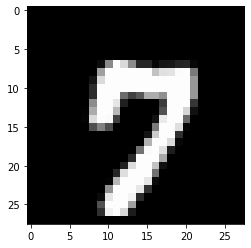

Prediction:  [1]
Label:  1


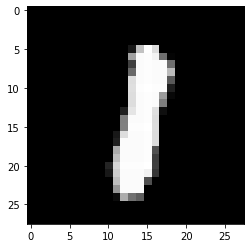

Prediction:  [1]
Label:  1


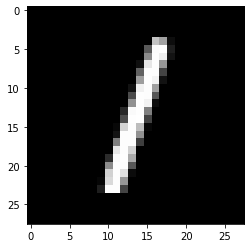

Prediction:  [9]
Label:  9


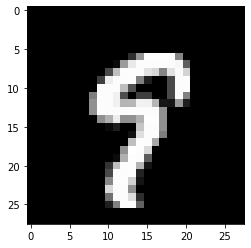

In [39]:
test_prediction(2, W1, b1, W2, b2, W3, b3)
test_prediction(8, W1, b1, W2, b2, W3, b3)
test_prediction(0, W1, b1, W2, b2, W3, b3)
test_prediction(3, W1, b1, W2, b2, W3, b3)

In [40]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2, W3, b3)
get_accuracy(dev_predictions, Y_dev)

[0 3 1 7 7 2 6 8 8 4 6 4 3 8 0 8 4 9 7 7 5 0 4 4 9 1 8 7 0 8 2 4 8 8 9 6 0
 4 9 2 9 4 2 9 1 2 9 5 3 5 5 4 8 0 3 7 2 4 6 5 5 1 0 6 6 2 5 2 4 9 8 9 6 6
 5 6 9 8 2 6 1 2 0 7 2 3 7 9 9 9 4 6 5 4 2 4 6 4 1 0 8 6 7 1 8 9 6 4 2 9 7
 8 9 7 3 4 7 3 6 8 2 1 6 2 6 1 2 7 8 0 7 1 2 2 4 9 5 4 2 1 5 0 0 3 4 1 8 6
 1 3 5 6 8 5 0 4 7 1 6 5 1 0 0 7 1 3 8 7 2 7 3 3 1 4 2 3 2 6 7 8 3 1 5 7 2
 6 4 5 6 9 2 3 3 7 0 0 4 6 8 2 1 3 0 5 5 6 2 8 8 8 2 8 8 9 7 6 7 5 7 1 6 8
 0 0 3 6 2 2 5 0 7 7 3 9 5 4 0 4 1 5 5 9 1 5 0 3 7 0 9 4 1 0 3 5 9 7 3 8 4
 6 0 3 7 4 8 4 3 1 0 4 4 9 9 1 8 0 3 0 8 0 5 8 2 7 0 9 4 1 7 6 1 0 3 1 4 7
 4 7 1 3 4 3 8 0 8 0 9 9 6 0 8 1 0 3 0 1 9 6 6 7 0 1 8 9 6 0 1 8 1 5 2 5 1
 2 7 0 3 7 1 3 7 5 8 4 4 9 5 1 6 2 3 1 2 1 7 6 3 7 0 9 0 4 2 3 8 9 7 9 2 7
 8 4 7 5 4 9 3 0 7 6 6 5 6 7 9 0 9 7 8 5 2 2 0 4 5 5 4 2 2 8 6 2 9 9 6 9 0
 4 6 4 1 0 4 3 8 2 3 1 4 9 7 0 0 1 9 2 1 5 1 4 8 4 5 8 1 6 9 3 2 8 8 7 9 7
 6 8 9 6 5 1 2 6 4 2 9 4 3 8 0 7 6 9 6 4 4 9 7 7 8 7 9 1 6 6 1 0 8 3 7 7 9
 6 9 1 6 3 0 3 9 3 0 6 1 

0.801